In [1]:
import pandas as pd
import os

Задание 1

Опишите задачу с точки зрения NLP. Что это за задача, какие классические методы существуют для ее решения? Как ее можно решать через LLM? Как обычно оценивают качество моделей в этой задаче?

Задача: Извлечение сущностей PER, ORG, LOC, EVT, PRO из текста.

1. Классические методы:
Можно решать с помощью шаблонов для поиска сущностей. Также существуют статистические методы, например, Naive Bayes и CRF, которые обучаются на размеченных данных.
2. Решение с помощью LLM:
Модели на основе трансформеров обучаются на огромных данных. Они анализируют контекст и семантику слов, что помогает правильно извлекать сущности в текстах.
3. Оценка качества:
* Точность (Precision): Насколько правильно модель находит сущности.
* Полнота (Recall): Сколько сущностей модель нашла из всех возможных.
* F1-мера: Сбалансированное сочетание точности и полноты.

Задание 2

Реализуйте чтение датасета в pandas DataFrame с обязательными колонками "document_id", "document_text", "entity", "gold_answer". Выведите шапку датафрейма.

In [2]:
def dataset(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            document_id = filename.split('.')[0]
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
                document_text = file.read()
            data.append({"document_id": document_id, "document_text": document_text, "entity": "", "gold_answer": ""})

    df = pd.DataFrame(data)
    return df
df = dataset('/content/drive/MyDrive/Работа/Сбер/dataset')
df.head()

,document_id,document_text,entity,gold_answer
0,brexit_ru,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,,
1,brexit_ru,ru-1010\nru\n2018-07-09\nhttps://www.segodnya....,,
2,brexit_ru,ru-1025\nru\n2018-07-09\nhttp://ura-inform.com...,,
3,brexit_ru,ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...,,
4,brexit_ru,ru-1012\nru\n2018-07-09\nhttps://regnum.ru/new...,,


In [47]:
file_path = "/content/drive/MyDrive/Работа/Сбер/df - Лист1 (1).csv"
fg = pd.read_csv(file_path)

In [48]:
fg = fg.drop(columns=['Unnamed: 0'])
# fg = fg.dropna()
fg

,document_id,document_text,entity,gold_answer,pred_answer
0,1024,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,PER,Доминик Рааб,Доминик Рааб
1,1024,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,PER,Дэвид Дэвис,Дэвид Дэвис
2,1024,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,PER,Тереза Мэй,Тереза Мэй
3,1024,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,PER,Маргаритис Схинас,Маргаритис Схинас
4,1024,ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...,PER,Елизавета II,Королева Великобритании Елизавета II
...,...,...,...,...,...
158,1027,ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...,EVT,Брекзит,NaN
159,1027,ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...,EVT,Референдум 2016 года,NaN
160,1027,ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...,EVT,Выход Великобритании из ЕС,Выход Великобритании из ЕС
161,1027,ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...,EVT,Переходный период,Переходный период


Задание 3

Напишите функцию, которая принимает на вход строку датафрейма и выдает текст входного сообщения для LLM.

In [5]:
def prompt(row):
    return f'''В тексте {row['document_text']} выдели следующие сущности: PER — имена людей (без титулов);
    ORG — компании, учреждения, команды; LOC — города, страны, регионы, объекты инфраструктуры; EVT — события, катастрофы, праздники, PRO — товары, фильмы, книги, инициативы.
    А также: извлекай самую длинную форму сущности; в сложных фразах выделяй каждую сущность отдельно.
    Формат вывода: Первая строка — идентификатор файла. Далее строки в формате:
    Упоминание-именованной-сущности <ТАБ> базовая форма <ТАБ> категория <ТАБ> кросс-языковой идентификатор
    Кодировка UTF-8, выходной файл .out.
    Постарайся найти абсолютно все сущности: PER, ORG, LOC, EVT, PRO'''

df["prompt"] = df.apply(prompt, axis=1)
df["prompt"]

,prompt
0,В тексте ru-1024\nru\n2018-07-09\nhttps://focu...
1,В тексте ru-1010\nru\n2018-07-09\nhttps://www....
2,В тексте ru-1025\nru\n2018-07-09\nhttp://ura-i...
3,В тексте ru-1027\nru\n2018-07-09\nhttps://bin....
4,В тексте ru-1012\nru\n2018-07-09\nhttps://regn...
5,В тексте ru-1011\nru\n2018-07-09\nhttps://tsar...
6,В тексте ru-1014\nru\n2018-07-09\nhttp://www.t...
7,В тексте ru-1013\nru\n2018-07-09\nhttps://regn...
8,В тексте ru-1026\nru\n2018-07-09\nhttp://polit...


Задание 5

Реализуйте самостоятельно алгоритм для подсчета метрик score_fn(gold: str, pred: str) → float. Можно пользоваться только библиотеками numpy, scipy, pandas. Напишите юнит-тесты. Возможно ли ускорить вычисление функции через векторную реализацию? Поясните решение и обоснуйте, почему выбрали именно такую метрику.

С помощью этих метрик мы можем оценить работу модели:

Точность (Precision): Насколько правильно модель находит сущности.
Полнота (Recall): Сколько сущностей модель нашла из всех возможных.
F1-мера: Сбалансированное сочетание точности и полноты.

In [49]:
import numpy as np
import pandas as pd

def score_fn(gold: str, pred: str):
    if isinstance(gold, str) and isinstance(pred, str):
        gold_entities = set(gold.split())
        pred_entities = set(pred.split())
        TP = len(gold_entities & pred_entities)
        FP = len(pred_entities - gold_entities)
        FN = len(gold_entities - pred_entities)
        precision = TP / (TP + FP) if TP + FP > 0 else 0.0
        recall = TP / (TP + FN) if TP + FN > 0 else 0.0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0.0
    else:
        precision = recall = f1 = 0.0
    return {'precision': precision, 'recall': recall, 'f1': f1}

metrics = fg.apply(lambda row: score_fn(row['gold_answer'], row['pred_answer']), axis=1)
metrics_df = pd.json_normalize(metrics)
fg = pd.concat([fg, metrics_df], axis=1)
print(fg)

     document_id                                      document_text entity  \
0           1024  ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...    PER   
1           1024  ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...    PER   
2           1024  ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...    PER   
3           1024  ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...    PER   
4           1024  ru-1024\nru\n2018-07-09\nhttps://focus.ua/worl...    PER   
..           ...                                                ...    ...   
158         1027  ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...    EVT   
159         1027  ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...    EVT   
160         1027  ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...    EVT   
161         1027  ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...    EVT   
162         1027  ru-1027\nru\n2018-07-09\nhttps://bin.ua/news/f...    PRO   

                    gold_answer                           pred_

In [61]:
import unittest

class TestScoreFn(unittest.TestCase):
    def test_perfect_match(self):
        gold = "Тереза Мэй"
        pred = "Тереза Мэй"
        result = score_fn(gold, pred)
        self.assertEqual(result, 1.0)

    def test_partial_match(self):
        gold = "Тереза Мэй"
        pred = "Тереза Мэй Борис Джонсон"
        result = score_fn(gold, pred)
        self.assertEqual(result, 0.5)

    def test_no_match(self):
        gold = "Тереза Мэй"
        pred = "Борис Джонсон"
        result = score_fn(gold, pred)
        self.assertEqual(result, 0.0)

    def test_empty_gold(self):
        gold = ""
        pred = "Тереза Мэй"
        result = score_fn(gold, pred)
        self.assertEqual(result, 0.0)

    def test_empty_pred(self):
        gold = "Тереза Мэй"
        pred = ""
        result = score_fn(gold, pred)
        self.assertEqual(result, 0.0)

    def test_empty_both(self):
        gold = ""
        pred = ""
        result = score_fn(gold, pred)
        self.assertEqual(result, 0.0)

if __name__ == "__main__":
    unittest.main()

E
ERROR: /root/ (unittest.loader._FailedTest./root/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Задание 6

Вычислите метрики для каждой строки в датафрейме. Сагрегируйте результаты а) по каждой сущности, б) по каждому документу. Изобразите результаты на графиках. Какие выводы можно сделать?

In [51]:
# а) по каждой сущности
entity_metrics = fg.groupby('entity')[['precision', 'recall', 'f1']].mean().reset_index()

# б) по каждому документу
doc_metrics = fg.groupby('document_id')[['precision', 'recall', 'f1']].mean().reset_index()

print("Метрики по сущности:")
print(entity_metrics)

print("\nМетрики по документу:")
print(doc_metrics)

Метрики по сущности:
  entity  precision    recall        f1
0    EVT   0.333333  0.333333  0.333333
1    LOC   0.540541  0.540541  0.540541
2    ORG   0.447368  0.434211  0.438596
3    PER   0.762500  0.725000  0.733333
4    PRO   0.200000  0.200000  0.200000

Метрики по документу:
   document_id  precision    recall        f1
0         1010   0.428571  0.321429  0.357143
1         1011   0.375000  0.375000  0.375000
2         1012   0.357143  0.357143  0.357143
3         1013   0.523810  0.500000  0.507937
4         1014   0.388889  0.361111  0.370370
5         1024   0.472222  0.500000  0.481481
6         1025   0.460000  0.460000  0.460000
7         1026   0.684211  0.684211  0.684211
8         1027   0.750000  0.750000  0.750000


<ipython-input-60-14ed6d67883d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entity_metrics, x="entity", y="precision", palette="viridis")


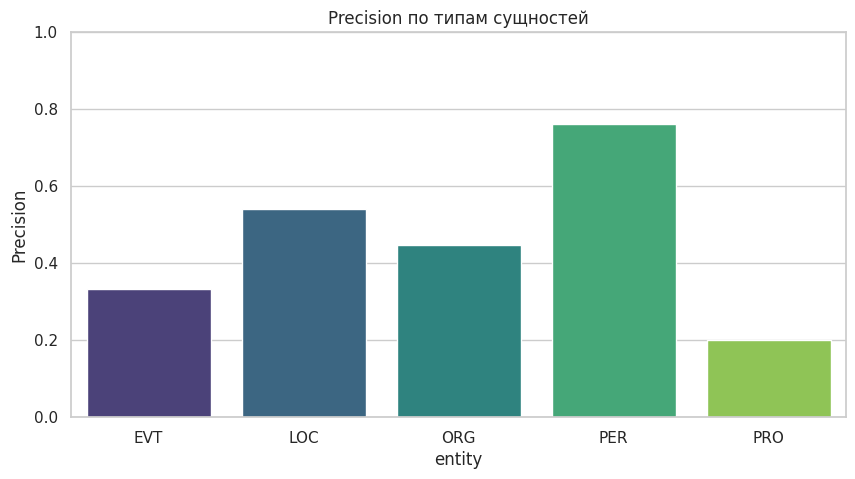

<ipython-input-60-14ed6d67883d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entity_metrics, x="entity", y="recall", palette="viridis")


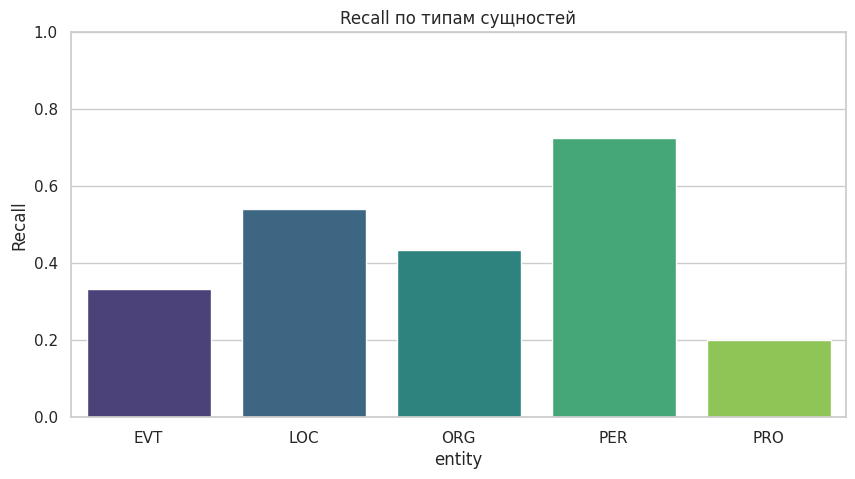

<ipython-input-60-14ed6d67883d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entity_metrics, x="entity", y="f1", palette="viridis")


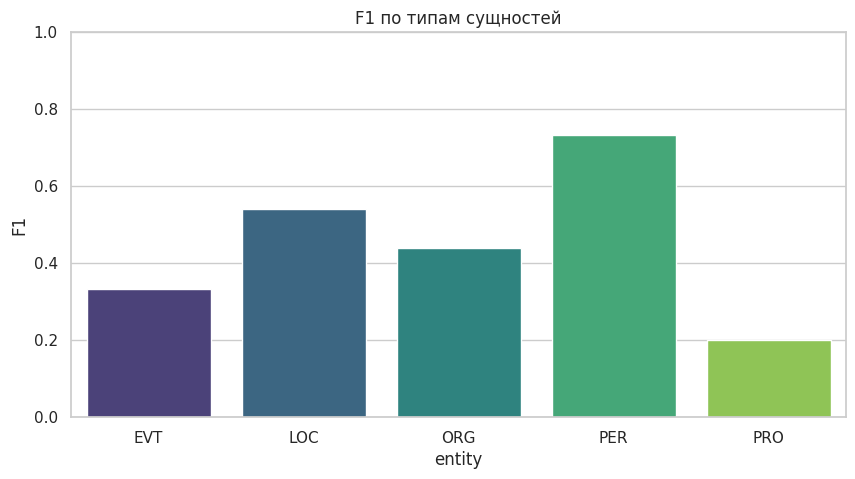

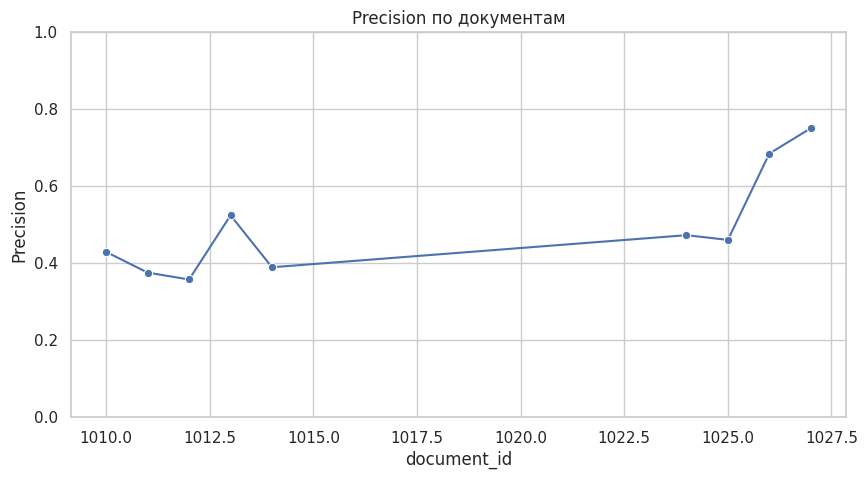

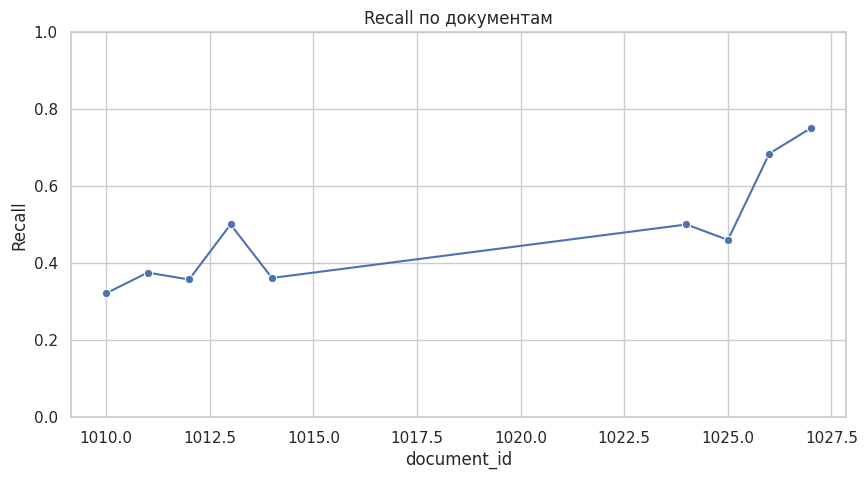

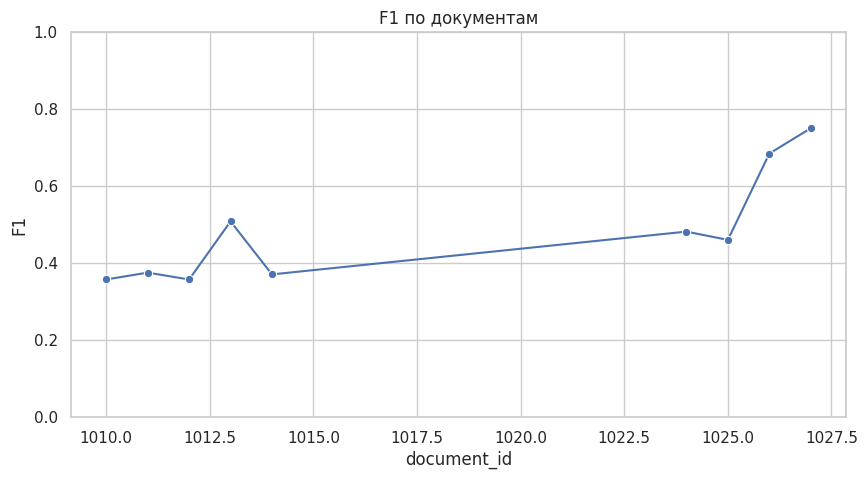

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=entity_metrics, x="entity", y="precision", palette="viridis")
plt.title("Precision по типам сущностей")
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=entity_metrics, x="entity", y="recall", palette="viridis")
plt.title("Recall по типам сущностей")
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=entity_metrics, x="entity", y="f1", palette="viridis")
plt.title("F1 по типам сущностей")
plt.ylim(0, 1)
plt.ylabel("F1")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=doc_metrics, x="document_id", y="precision", marker="o", color='b')
plt.title("Precision по документам")
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=doc_metrics, x="document_id", y="recall", marker="o", color='b')
plt.title("Recall по документам")
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=doc_metrics, x="document_id", y="f1", marker="o", color='b')
plt.title("F1 по документам")
plt.ylim(0, 1)
plt.ylabel("F1")
plt.show()

Вывод: сущности PER находились лучше всего, а хуже всего PRO

Задание 7

Есть ли зависимость метрик от длины документа? Постройте графики, чтобы ответить на вопрос.

In [53]:
fg["doc_length"] = fg["document_text"].apply(lambda x: len(x.split()))

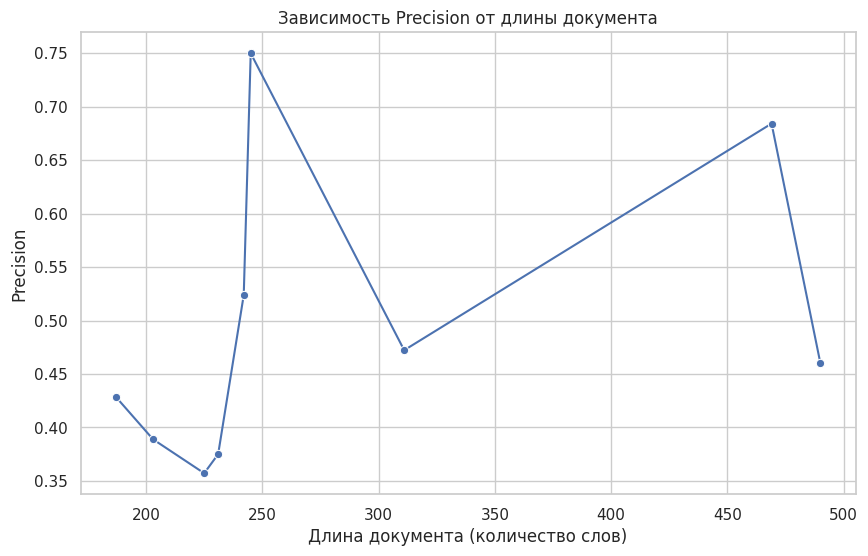

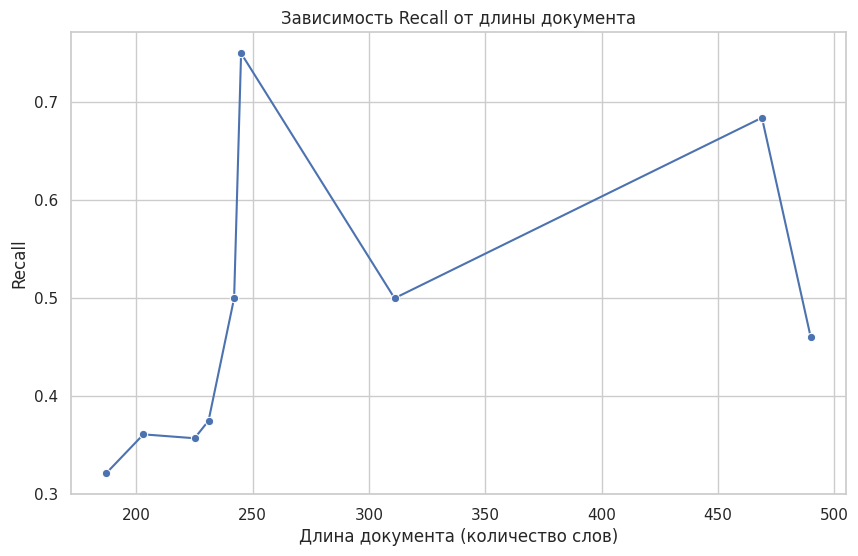

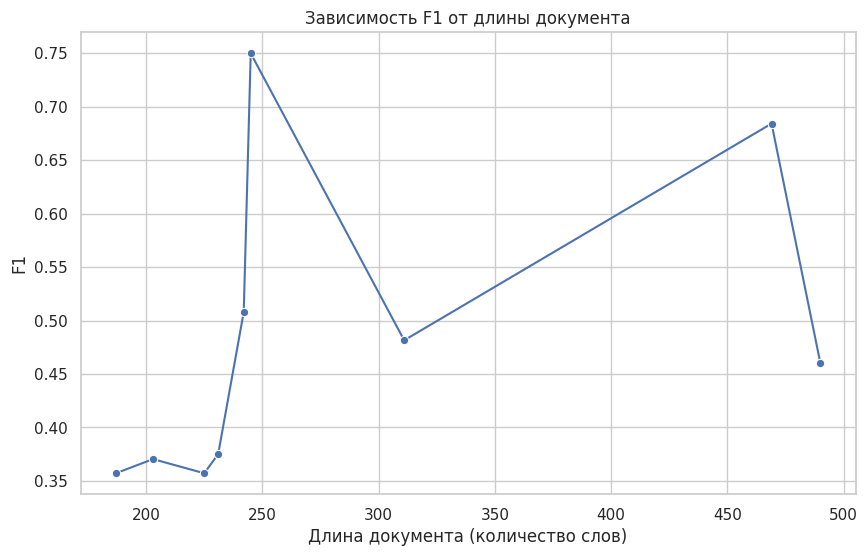

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

doc_metrics = fg.groupby('document_id')[['precision', 'recall', 'f1', 'doc_length']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=doc_metrics, x='doc_length', y='precision', marker="o", color='b')
plt.title('Зависимость Precision от длины документа')
plt.xlabel('Длина документа (количество слов)')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=doc_metrics, x='doc_length', y='recall', marker="o", color='b')
plt.title('Зависимость Recall от длины документа')
plt.xlabel('Длина документа (количество слов)')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=doc_metrics, x='doc_length', y='f1', marker="o", color='b')
plt.title('Зависимость F1 от длины документа')
plt.xlabel('Длина документа (количество слов)')
plt.ylabel('F1')
plt.grid(True)
plt.show()

Можно сделать вывод, что точность модели не зависит от длины документа

Задание 8

Проведите анализ ошибок. Когда модель чаще отвечает правильно, а когда ошибается? Предложите варианты, как повысить метрики.

Модель ошибается на коротких текстах. А также может тупать местами сущности, а также может по-разному написанное одно и тоже принять в качестве разных объектов.

По улучшению:

Можно почистить документы, а также написать более хороший промт, дополнительно обучать модель на нестандартных случаях, в том числе на разном написании одного и того же (например, сокращение).

Задание 9

Сделайте выводы по всему исследованию. Напишите, чему научились и что нового попробовали.

Были некоторые вопросы по ходу выполнения задания, например, откуда мы берем эталонные результаты в табличку (gold_answer), поэтому в работе могут быть недочеты.
Также возникли трудности в GigaChat в тг, мне предложили выбор либо написать в поддержку, либо Войти по номеру телефона, пришлось перейти во Вконтакте.

Интересное задание - были трудности с созданием хорошего промта, до этого я это не практиковала, также позанималась созданием датасета, тоже достаточно интересно, потому что потом по нему я смогла построить красивые графики и вообще оценить точность работы модели (понимаю, что из-за не совсем хорошего промта, модель показала не совсем хорошие результаты)